# Data Mining

## Tugas 3: Regresi Linear

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas3_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi *dilarang keras* menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat beberapa *packages* yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

### Import

In [1]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')

RANDOM_STATE = 1337

In [2]:
df = pd.read_csv('../Data Mining/dataset/diabetes.csv')
df['sex'] = df['sex'] - 1

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59,1,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,0,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,1,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,0,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,0,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Deskripsi Dataset

Diabetes dataset
================

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:
- Number of Instances: 442
- Number of Attributes: First 10 columns are numeric predictive values
- Target: Column 11 is a quantitative measure of disease progression one year after baseline
- Attributes:
    - :Age:
    - :Sex:
    - :Body mass index:
    - :Average blood pressure:
    - :S1:
    - :S2:
    - :S3:
    - :S4:
    - :S5:
    - :S6:

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

## 1. Eksplorasi Awal Data (25 poin)

Sebelum menerapkan model regresi, Anda diminta untuk mengeksplorasi atribut dan label yang akan digunakan dalam tugas ini.

### Soal 1.1 (6 poin)

Gambarkan histogram untuk `age`, `bmi`, dan `bp`. Gambarkan juga kurva distribusi Gaussian yang dicocokkan dengan tiap atribut tersebut.

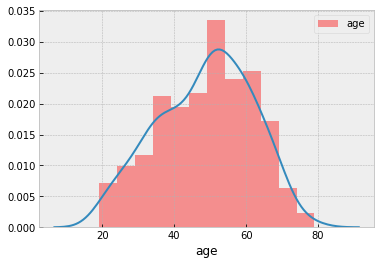

In [4]:
sns.distplot(df['age'], hist_kws={'color': 'r'}, label='age')
plt.legend()

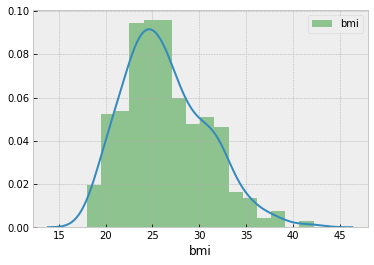

In [5]:
sns.distplot(df['bmi'], hist_kws={'color': 'g'}, label='bmi')
plt.legend()

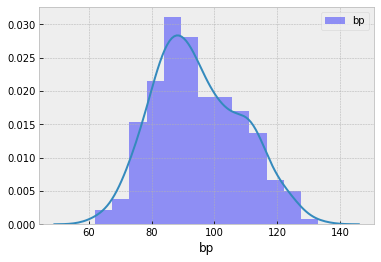

In [6]:
sns.distplot(df['bp'], hist_kws={'color': 'b'}, label='bp')
plt.legend()

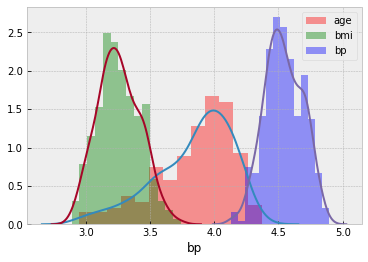

In [7]:
sns.distplot(np.log(df['age']), hist_kws={'color': 'r'}, label='age')

sns.distplot(np.log(df['bmi']), hist_kws={'color': 'g'}, label='bmi')

sns.distplot(np.log(df['bp']), hist_kws={'color': 'b'}, label='bp')
plt.legend()

### Soal 1.2 (2 poin)

Gambarkan bar plot untuk `sex`.

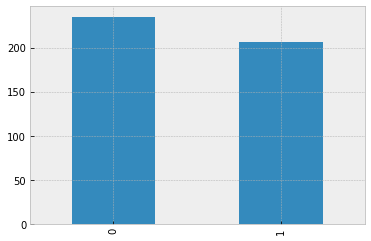

In [8]:
pd.value_counts(df['sex']).plot.bar()

### Soal 1.3.a (2 poin)

Karena kita mungkin akan kesulitan memahami atribut `s1`-`s6`, coba gambarkan dalam bentuk joint plot.

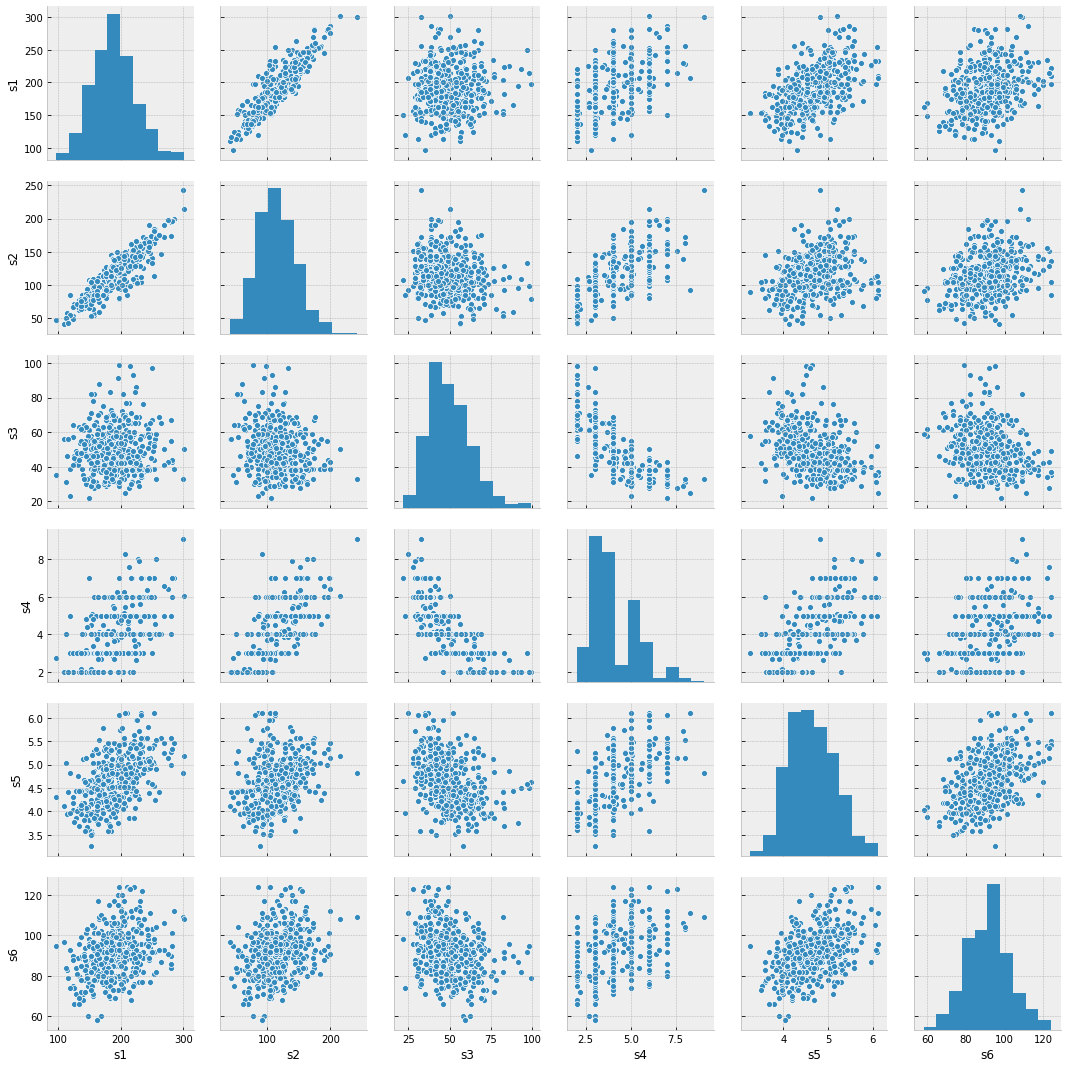

In [9]:
sns.pairplot(df[['s1','s2','s3','s4','s5','s6']])

### Soal 1.3.b (3 poin)

Gambarkan juga *correlation heatmap* dari keenam nilai serum tersebut. Apakah ada pola menarik yang Anda temukan?

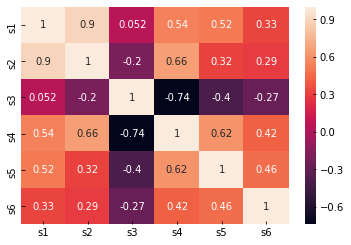

In [10]:
sns.heatmap(df[['s1','s2','s3','s4','s5','s6']].corr(), annot=True)

*Dari heatmap tersebut, dapat diketahui S1 berkorelasi tinggi dengan S2, S3 berkorelasi rendah dengan S4, S4 berkorelasi tinggi dengan S5, dan S6 berkorelasi cukup tinggi dengan S5*

*Setiap atribut yang berkorelasi dengan S4 bisa berkorelasi cukup tinggi (>0.4) atau bisa berkorelasi sangat rendah (<0.5)*

*Atribut S6 tidak terlalu berkorelasi tinggi maupun rendah dengan atribut apapun (-0.5<corr<0.5)*

### Soal 1.4.a (3 poin)

Gambarkan *correlation heatmap* untuk semua atribut dan label dari data yang diberikan. Apa yang dapat Anda amati?

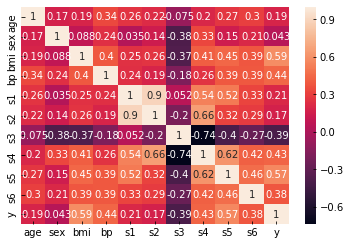

In [11]:
sns.heatmap(df.corr(), annot=True)

*Atribut y memiliki korelasi yang tinggi dengan atribut bmi, dan atribut age, sex, dan bp tidak memiliki korelasi yang cukup tinggi dengan atribut apapun (-0.5<corr<0.5)*

### Soal 1.4.b (2 poin)

Anda mungkin melihat bahwa salah satu atribut yang berkorelasi cukup kuat dengan label yang digunakan adalah `bmi`. Coba gambarkan *scatter plot* dengan menggunakan `bmi` sebagai sumbu horizontal dan `y` sebagai sumbu vertikal.

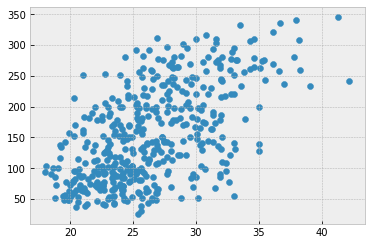

In [12]:
plt.scatter(x = 'bmi', y = 'y', data = df)

### Soal 1.5 (2 poin)

Gambarkan histogram dari label yang Anda gunakan agar dapat lebih memahami kasus yang Anda akan tangani. Laporkan juga *summary statistics*-nya.

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: y, dtype: float64

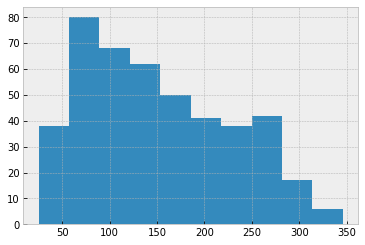

In [13]:
plt.hist(df['y'])
df['y'].describe()

### Soal 1.6 (5 poin)

Lakukan eksplorasi tambahan dari data ini.

In [14]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,0.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,0.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,0.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,0.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,1.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,1.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


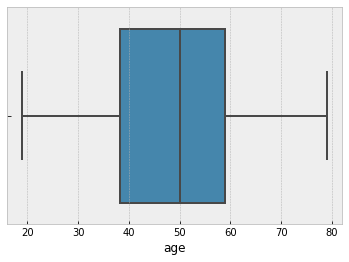

In [15]:
sns.boxplot(df['age']) 

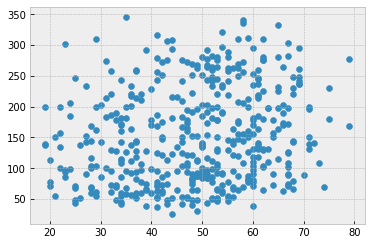

In [16]:
plt.scatter(x = 'age', y = 'y', data = df)

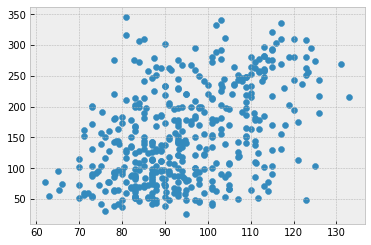

In [17]:
plt.scatter(x = 'bp', y = 'y', data = df)

## 2. Regresi Linear (35 poin)

Anda diminta untuk melakukan regresi pada dataset yang telah diberikan. Tentu akan sangat baik jika Anda bisa memahami label yang akan diprediksi. Namun, dalam tugas ini, Anda tidak perlu berfokus pada interpretasi dari label dan prediksinya. Anda hanya diminta untuk menjelaskan hasil eksplorasi Anda dengan *benchmark* yang ditetapkan di awal.

### Soal 2.1 (2 poin)

Bagi dataset Anda menjadi 70% data latih dan 30% data uji dengan menggunakan `train_test_split()`.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['y']),df['y'], test_size = 0.3)

### Soal 2.2.a (3 poin)

Gunakan modul OLS dari `statsmodels` untuk memprediksi `y` dari `bmi`, `age`, `bp`, dan `s5`.

In [19]:
import statsmodels.api as sm
ols1 = sm.OLS(y_train,x_train[['bmi','age','bp','s5']])
ols1 = ols1.fit()

ols1_pred = ols1.predict(x_test[['bmi','age','bp','s5']])

ols1.params

bmi    5.638208
age   -0.298485
bp    -0.015260
s5     4.556172
dtype: float64

In [20]:
# fig, ax = plt.subplots()
# ax.plot(x_test, y_pred, 'o', label="Data")
# ax.plot(x_test, y_test, '-', label="True")
# ax.legend(loc="best");

### Soal 2.2.b (2 poin)

Hitunglah RMSE dari model tersebut pada data latih.

In [21]:
from math import sqrt

rmseols1 = sqrt(mean_squared_error(y_test, ols1_pred))

print(rmseols1)

68.20090313859208


### Soal 2.2.c (2 poin)

Gambarkan residual plot dari hasil soal 2.2.b.

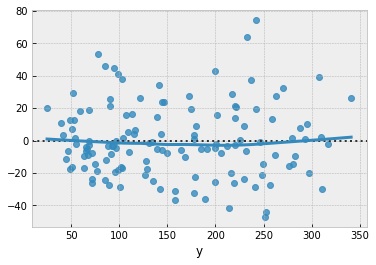

In [22]:
sns.residplot(y_test, ols1_pred, lowess=True)

### Soal 2.3.a (3 poin)

Lakukan pemodelan seperti pada soal 2.2.a, tapi tambahkan variabel `s3`. Apa yang dapat Anda amati?

In [23]:
import statsmodels.api as sm
ols2 = sm.OLS(y_train,x_train[['bmi','age','bp','s5','s3']])
ols2 = ols2.fit()

ols2_pred = ols2.predict(x_test[['bmi','age','bp','s5','s3']])

ols2params = np.array(ols2.params)
print(ols2params)

[ 4.95123304 -0.17163202  0.44091635 15.30324851 -1.67364786]


*Terdapat perubahan yang signifikan pada parameter s5, sebelumnya hanya 4.55 dan sekarang menjadi 15.30*

### Soal 2.3.b (2 poin)

Hitung RMSE dari model 2.3.a pada data latih.

In [24]:
from math import sqrt

rmseols2 = sqrt(mean_squared_error(y_test, ols2_pred))

print(rmseols2)

58.52974430764765


### Soal 2.4.a (2 poin)

Apa fungsi regularisasi seperti pada *ridge* dan *lasso regression*?

*Untuk menghindari overfitting, serta pemberian penalti untuk koefisien model*

### Soal 2.4.b (2 poin)

*Loss function* dengan regularisasi $L_2$ didefinisikan sebagai
$$
O(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \mathbf{x}_i)^2 - \alpha \|\mathbf{w}\|_2^2
$$
Apa yang terjadi saat $\alpha \rightarrow 0$ dan $\alpha \rightarrow \infty$?

*Apabila $\alpha \rightarrow 0$, maka nilai koefisien model mendekati $\infty$, sedangkan apabila $\alpha \rightarrow \infty$, maka nilai koefisien model mendekati $0$*

### Soal 2.4.c (5 poin)

Bandingkan koefisien dari model soal 2.3 dengan Ridge dengan $\alpha = [0, 1, 10, 100, 1000, 10000]$ dengan line plot. Bandingkan pula RMSE-nya. Apa yang dapat Anda amati?

In [25]:
alphas = 0,1,10,100,1000,10000

namemodel = ['ols']
coefs = [ols2params]
rmse = [rmseols2]
for alp in alphas:
    ridge = Ridge(alpha=alp)
    ridge.fit(x_train[['bmi','age','bp','s5','s3']], y_train)
    coefs.append(ridge.coef_)
    ridge_pred = ridge.predict(x_test[['bmi','age','bp','s5','s3']])
    RMSE = sqrt(mean_squared_error(y_test, ridge_pred))
    rmse.append(RMSE)
    namemodel.append ('rr'+str(alp))

No handles with labels found to put in legend.


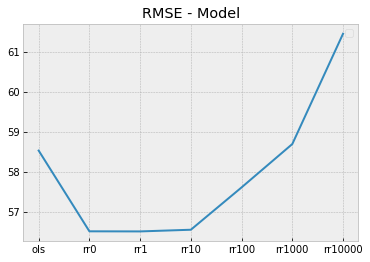

In [26]:
plt.plot(namemodel,rmse)
plt.title('RMSE - Model')
plt.legend()

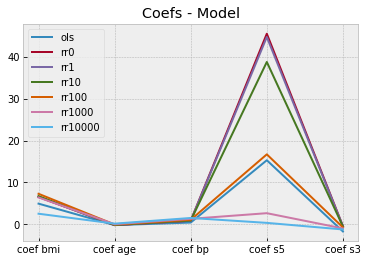

In [46]:
plt.plot(['coef bmi','coef age','coef bp','coef s5','coef s3'],coefs[0], label=namemodel[0])
plt.plot(coefs[1], label=namemodel[1])
plt.plot(coefs[2], label=namemodel[2])
plt.plot(coefs[3], label=namemodel[3])
plt.plot(coefs[4], label=namemodel[4])
plt.plot(coefs[5], label=namemodel[5])
plt.plot(coefs[6], label=namemodel[6])
plt.title('Coefs - Model')
plt.xticks(np.arange(0,5,1)) 
plt.legend()

### Soal 2.5 (5 poin)

Carilah model dengan kinerja terbaik, lakukan prediksi pada data uji, lalu laporkan RMSE-nya. Anda sebaiknya menyertakan satu *baseline* sebagai perbandingan.

In [44]:
baselinename = namemodel[1]
baselinecoef = coefs[1]
baselinermse = rmse[1]
print('=== Baseline ===')
print('model = ' + str(baselinename))
print('coef = ' + str(baselinecoef))
print('rmse = ' + str(baselinermse))

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train[['bmi','age','bp','s5','s3']])
x_test_poly = poly.fit_transform(x_test[['bmi','age','bp','s5','s3']])

lassopoly = Lasso(alpha=1)
lassopoly.fit(x_train_poly, y_train)
lassopoly_pred = lassopoly.predict(x_test_poly)

rmse_lassopoly = sqrt(mean_squared_error(y_test, lassopoly_pred))

print('')
print('=== New Model ===')
print('newmodel = Lasso with Polynomial Features (2)')
print('coef = ' + str(lassopoly.coef_))
print('rmse = ' + str(rmse_lassopoly))

=== Baseline ===
model = rr0
coef = [ 6.54535361 -0.16533573  0.86657923 45.47173968 -0.42082142]
rmse = 56.51627609801226

=== New Model ===
newmodel = Lasso with Polynomial Features (2)
coef = [ 0.00000000e+00 -0.00000000e+00 -4.14103937e+00 -4.58870264e+00
  0.00000000e+00 -0.00000000e+00  7.62176413e-02 -8.19063412e-02
  1.20400816e-01 -0.00000000e+00 -1.10711358e-01  1.94595242e-02
  3.32447150e-02  4.29321600e-01 -1.45934315e-02 -1.25514558e-02
  3.58598104e-01  2.69085938e-02 -1.66843230e+00  1.52177973e-01
 -2.27944858e-03]
rmse = 56.06011024785149


C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Soal 2.6 (2 poin)

Dalam eksplorasi ini, Anda diminta menggunakan RMSE sebagai *evaluation metrics*. Kapan Anda dapat menggunakan *metrics* alternatif seperti *mean absolute error* (MAE)? Apa keuntungannya?

*MAE digunakan ketika data memiliki variansi yang kecil, dikarenakan setiap data akan diberikan bobot (weight) yang sama. Keuntungannya yaitu nilai error akan lebih kecil dibandingkan RMSE*

### Soal 2.7 (5 poin)

Berikan kesimpulan Anda dari eksplorasi yang telah dilakukan.

*Dari eksplorasi yang telah dilakukan, diketahui bahwa semakin besar alpha pada Ridge, maka nilai RMSEnya akan semakin tinggi; ketika menambahkan parameter baru yaitu s3, model menjadi lebih baik dibandingkan sebelumnya, dan model terbaik yang bisa dibangun yaitu menggunakan lasso dengan alpha = 1, dan menggunakan preprocessing PolynomialFeatures 2 derajat*